# Shrey Viradiya
### 18BCE259

# Decision Tree using sklearn

In [20]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics
import graphviz
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [21]:
X, y = load_iris(return_X_y= True)
X, y = shuffle(X, y, random_state = 259)
class_names, feature_names = load_iris()['target_names'], load_iris()['feature_names']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=259)

## Classification Report Function

In [23]:
def Report(clf, prediction, y_true, class_names, feature_names):
    print("Prediction Report: ", clf.__name__)
    print("===================")

    print("Accuracy: ", metrics.accuracy_score(y_true, prediction))
    print(metrics.classification_report(y_true, prediction, target_names = class_names))
    print(metrics.confusion_matrix(y_true, prediction))

    plt.figure(figsize=(16,20))
    tree.plot_tree(clf, feature_names = feature_names, class_names= class_names, filled=True)
    plt.savefig(f"{clf.__name__}.jpg")

## ID3

In [24]:
id3 = tree.DecisionTreeClassifier(criterion='entropy')
id3.__name__ = 'id3'
id3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
prediction_id3 = id3.predict(X_test)

Prediction Report:  id3
Accuracy:  0.9210526315789473
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.88      0.94      0.91        16
   virginica       0.92      0.86      0.89        14

    accuracy                           0.92        38
   macro avg       0.94      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38

[[ 8  0  0]
 [ 0 15  1]
 [ 0  2 12]]


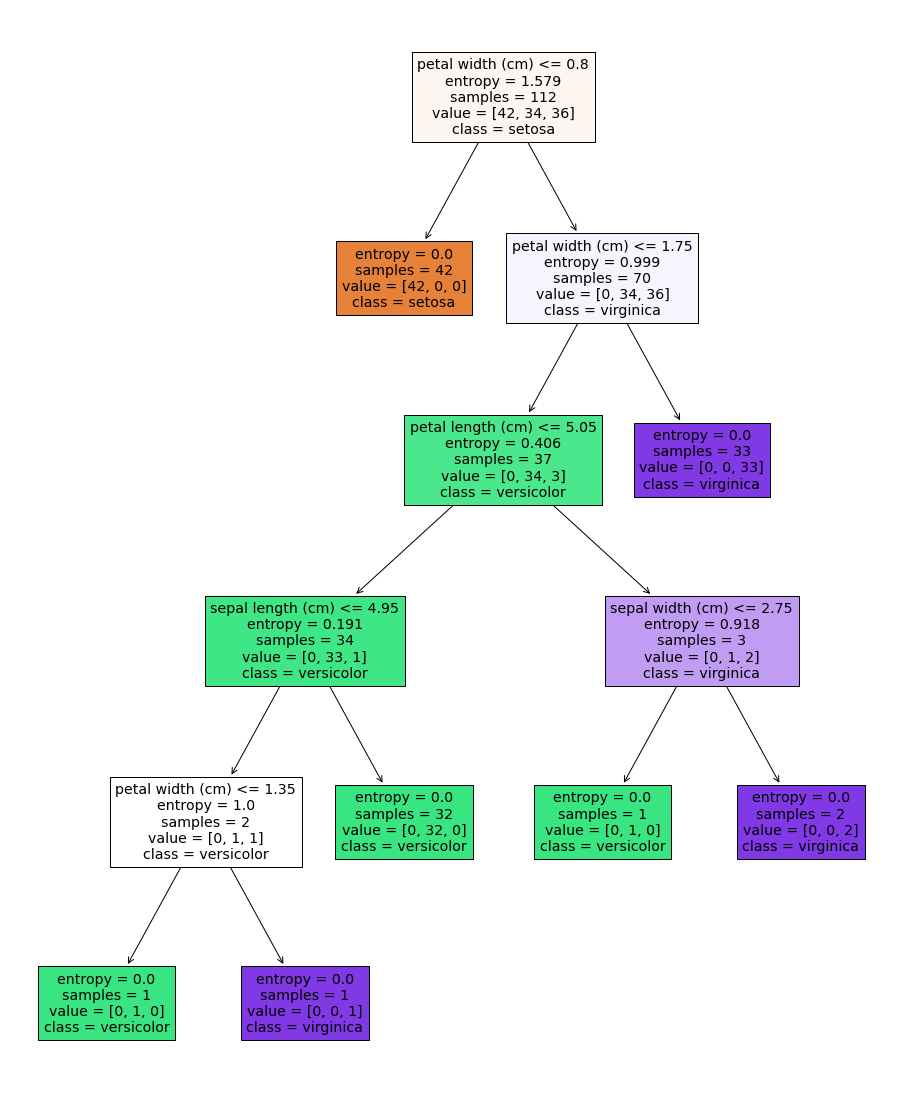

In [26]:
Report(id3, prediction_id3, y_test, class_names, feature_names)

## CART

In [27]:
cart = tree.DecisionTreeClassifier()
cart.__name__ = 'cart'
cart.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
prediction_cart = cart.predict(X_test)

Prediction Report:  cart
Accuracy:  0.9210526315789473
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.88      0.94      0.91        16
   virginica       0.92      0.86      0.89        14

    accuracy                           0.92        38
   macro avg       0.94      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38

[[ 8  0  0]
 [ 0 15  1]
 [ 0  2 12]]


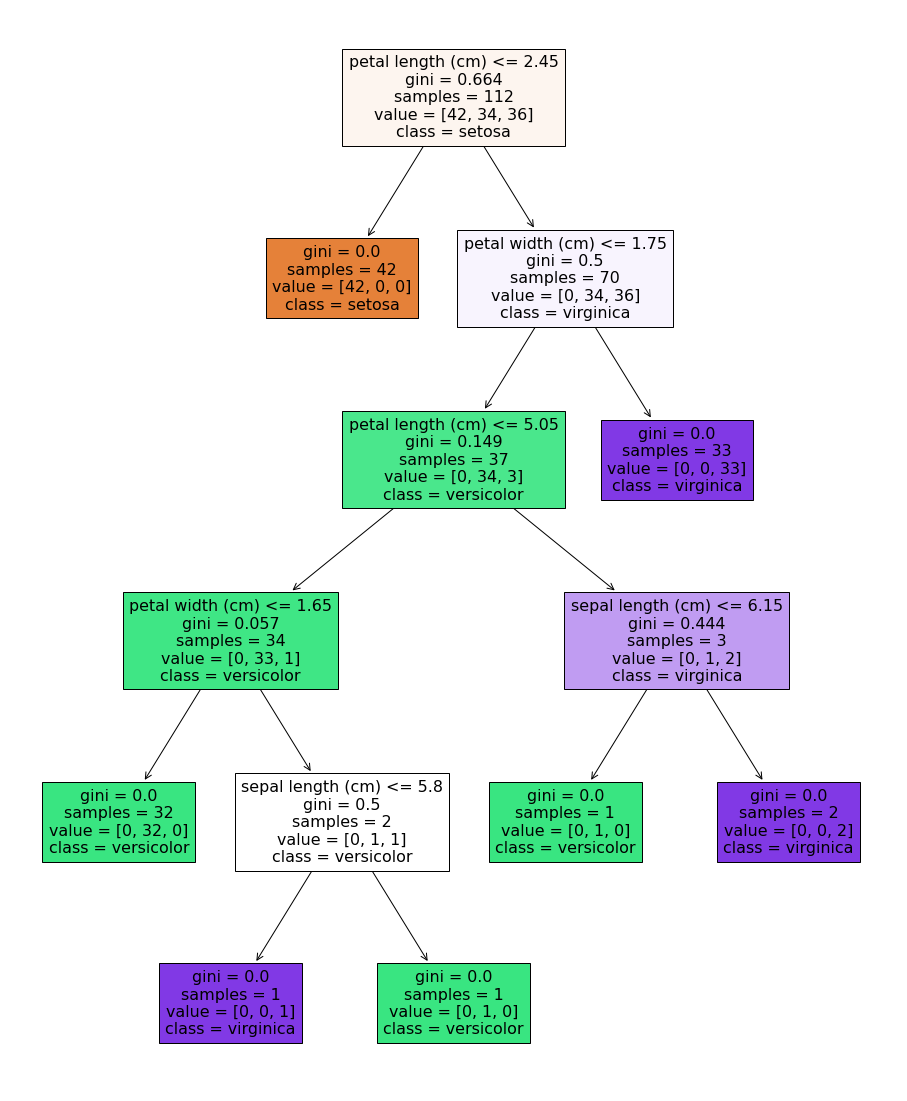

In [29]:
Report(cart, prediction_cart, y_test, class_names, feature_names)

## Categorical Data

In [30]:
# only want categorical data
churn = pd.read_csv('Churn_Modelling.csv')
del churn['RowNumber']
del churn['CustomerId']
del churn['Surname']
del churn['Balance']
del churn['EstimatedSalary']
churn = churn.astype('category')

In [31]:
churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'Exited'],
      dtype='object')

In [32]:
churn.describe()

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,460,3,2,70,11,4,2,2,2
top,850,France,Male,37,2,1,1,1,0
freq,233,5014,5457,478,1048,5084,7055,5151,7963


In [33]:
churn

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,1,1,1,1
1,608,Spain,Female,41,1,1,0,1,0
2,502,France,Female,42,8,3,1,0,1
3,699,France,Female,39,1,2,0,0,0
4,850,Spain,Female,43,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,2,1,0,0
9996,516,France,Male,35,10,1,1,1,0
9997,709,France,Female,36,7,1,0,1,1
9998,772,Germany,Male,42,3,2,1,0,1


In [34]:
X = churn[['Geography', 'Gender', 'NumOfProducts','HasCrCard', 'IsActiveMember']]
X['Geography'] = X['Geography'].cat.codes
X['Gender'] = X['Gender'].cat.codes
y = churn['Exited']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=259)

In [36]:
id3 = tree.DecisionTreeClassifier(criterion='entropy')
id3.__name__ = 'id3_categorical'
id3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [37]:
prediction_id3 = id3.predict(X_test)

Prediction Report:  id3_categorical
Accuracy:  0.8168
              precision    recall  f1-score   support

      Exited       0.83      0.97      0.89      1983
  Not Exited       0.67      0.23      0.34       517

    accuracy                           0.82      2500
   macro avg       0.75      0.60      0.62      2500
weighted avg       0.79      0.82      0.78      2500

[[1925   58]
 [ 400  117]]


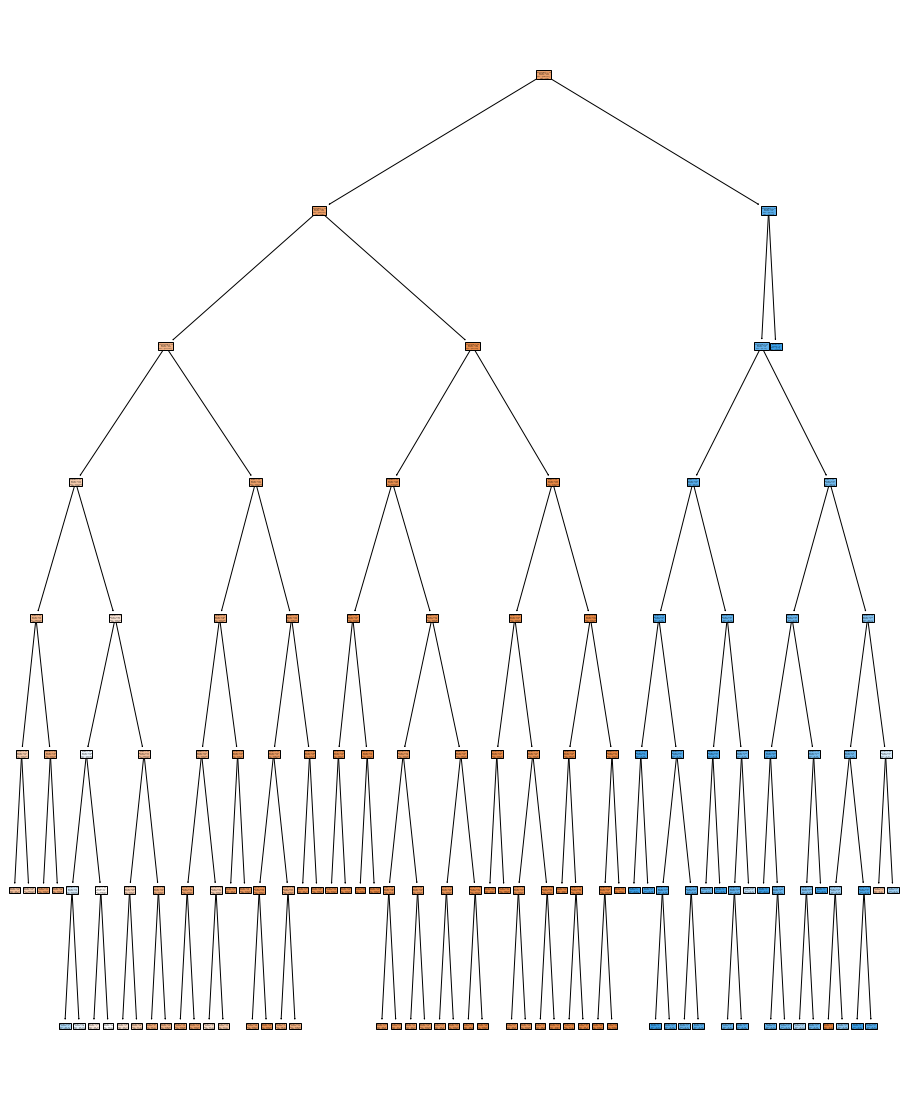

In [38]:
Report(id3, prediction_id3, y_test, 
        ['Exited', 'Not Exited'], 
        ['Geography', 'Gender', 'NumOfProducts','HasCrCard', 'IsActiveMember']
        )